## Imports ##

In [198]:
import time
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

## Exploring the Data ##

In [29]:
# Creating a data frame (10366 patients x 149 elements)
df = pd.read_csv('AGP_Metadata.csv', delimiter = ',')

# Creating a list of the columns
print('List of Columns:')
print(df.columns)
print('\n\n')

# Read specific columns
print('Diabetes Column:')
print(df['diabetes'])
print('\n\n')

# # Read a specific row
print('Patient 1\'s Data:')
print(df.iloc[0])

List of Columns:
Index(['sample_name', 'acne_medication', 'acne_medication_otc',
       'alcohol_consumption', 'alcohol_types_beercider',
       'alcohol_types_red_wine', 'alcohol_types_sour_beers',
       'alcohol_types_spiritshard_alcohol', 'alcohol_types_white_wine',
       'allergic_to_i_have_no_food_allergies_that_i_know_of',
       ...
       'country_residence', 'subset_healthy', 'survey_id', 'age_years',
       'age_corrected', 'bmi', 'bmi_corrected', 'weight_kg', 'longitude',
       'latitude'],
      dtype='object', length=149)



Diabetes Column:
0        4
1        0
2        0
3        0
4        0
        ..
10361    0
10362    0
10363    0
10364    0
10365    0
Name: diabetes, Length: 10366, dtype: int64



Patient 1's Data:
sample_name                  ERR1073439
acne_medication                       0
acne_medication_otc                   0
alcohol_consumption                   1
alcohol_types_beercider               0
                               ...     
bmi       

In [50]:
# Finding the possible values and frequencies of diabetes
print('Diabetes Frequencies and Values:')
print(df['diabetes'].value_counts())
print('\n\n')

# Describing the diabetes column's statistics
print('Diabetes Statistics:')
print(df['diabetes'].describe())

Diabetes Frequencies and Values:
0    9789
1     200
Name: diabetes, dtype: int64



Diabetes Statistics:
count    9989.000000
mean        0.020022
std         0.140083
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: diabetes, dtype: float64


## Cleaning the Data ##

In [129]:
# # Converting the numerical values to 'Case' or 'Control'
# named_diabetes_df = df
# named_diabetes_df['diabetes'] = named_diabetes_df['diabetes'].replace([1, 2, 3, 4], 'Case')
# named_diabetes_df['diabetes'] = named_diabetes_df['diabetes'].replace(0, 'Control')

# Creating a smaller data frame from the original one with the columns of interest
cleaned_df = cleaned_df[['sex','age_corrected','alcohol_frequency','meat_eggs_frequency',
           'specialized_diet_exclude_dairy','vegetable_frequency','whole_grain_frequency',
           'salted_snacks_frequency','bmi','diabetes']]

# Cleaning the diabetes column
cleaned_df = cleaned_df[((cleaned_df['diabetes'].isin([0, 1])).apply(pd.to_numeric))]

# Cleaning the bmi column
cleaned_df = cleaned_df[(cleaned_df['bmi'] != 'Not provided') & (cleaned_df['bmi'] != 'Unspecified')]
cleaned_df['bmi'] = cleaned_df['bmi'].apply(pd.to_numeric)
cleaned_df = cleaned_df[(cleaned_df['bmi'] >= 7.5) & (cleaned_df['bmi'] <= 204.0)]

# Cleaning the sex column
cleaned_df = cleaned_df[(cleaned_df['sex'] != 'Not provided') & (cleaned_df['sex'] != 'unspecified') & (cleaned_df['sex'] != 'other')]
cleaned_df['sex'] = cleaned_df['sex'].replace('male', 0)
cleaned_df['sex'] = cleaned_df['sex'].replace('female', 1)
cleaned_df = cleaned_df[(cleaned_df['age_corrected'] != 'Not provided') & (cleaned_df['age_corrected'] != 'Unspecified') & (cleaned_df['age_corrected'] != 'other')]

# Converting strings to ints
cleaned_df = cleaned_df.apply(pd.to_numeric)

In [128]:
# Lists of cases and controls
case_patients = []
control_patients = []
for i in range(len(cleaned_df)):
    if cleaned_df.iloc[i]['diabetes'] == 1:
        case_patients.append(i)
    else:
        control_patients.append(i)

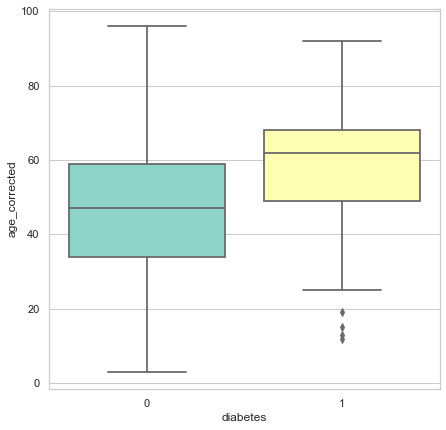

In [200]:
# Boxplot function

def boxplot(variable):
    plt.figure(figsize=(7,7,))
    ax = sns.boxplot(x = 'diabetes', y = variable, data = cleaned_df, palette = "Set3", saturation = 1, linewidth = 1.8)
    plt.show()
boxplot('age_corrected')

0    9789
1     200
Name: diabetes, dtype: int64

I tend to have normal formed stool - Type 3 and 4                          4512
Not provided                                                               2163
I tend to have normal formed stool                                         1096
I tend to have diarrhea (watery stool) - Type 5, 6 and 7                    895
I tend to be constipated (have difficulty passing stool) - Type 1 and 2     593
I tend to be constipated (have difficulty passing stool)                    252
I tend to have diarrhea (watery stool)                                      231
I don't know, I do not have a point of reference                            200
Unspecified                                                                  47
Name: bowel_movement_quality, dtype: int64

In [54]:
df.bmi.value_counts()

Not provided    133
22.31            45
Unspecified      44
21.63            41
21.46            38
               ... 
29.42             1
36.38             1
30.38             1
30.37             1
22.85             1
Name: bmi, Length: 2202, dtype: int64